## Capstone 2 - Wish.com Summer Products

This notebook explores summer product data taken from Wish.com. 

Data was retrieved from Kaggle at https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish?select=summer-products-with-rating-and-performance_2020-08.csv.

The following objectives will be pursued and answered throughtout this notebook:
   1. What are the top selling products? Least selling?
   2. How many products use ad-boosts?
       a. Do these ad-boosted products sell more than non-ad-boosted products?
       b. Do they have higher ratings?
       c. Are their prices any different from non-boosted products?
   3. Do discounted items sell more than non-discounted?
   4. Do discounted items have higher ratings?
   5. Does a higher rated/quality product sell more? 
   6. Is there a price-range that sells more than other ranges?
   7. Which factors most influence the success of an item?
       a. Rating?
       b. Price?
       c. Ad-boosts?
       d. Item type?
   8. Can we predict the success of an item with the factors provided?

## Libraries Required

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [2]:
summer = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

# The average price of a summer item is €8.32 with the highest priced item at €49 and the lowest item at €1. 
# The average retail price is $15 higher at $23. 
# The average rating is 3.82 out of 5. 

## Data Cleaning

The following columns will be dropped as they provide no value to the intended analysis, or are redundant to other columns. 

In [3]:
to_drop = ['product_url', 'merchant_profile_picture', 'theme', 'product_picture', 'crawl_month', 
        'merchant_info_subtitle', 'currency_buyer', 'title', 'urgency_text']
summer.drop(to_drop, inplace = True, axis=1)


Identifying which columns have null values. Many of the columns maintain a "1.0" or NaN value in a row, indicating an opportuntiy to better identify boolean values. 

In [4]:
# summer.isnull().any()

The rating count columns contain null values where there are likely 0 counts. These nulls have been replaced with 0. The urgency banner column contains "1" where the item has an urgency banner and a null value when the item does not have an urgency banner. The nulls are replaced with 0. 

In [5]:
summer['rating_five_count'] = summer['rating_five_count'].replace(np.nan, 0)
summer['rating_four_count'] = summer['rating_four_count'].replace(np.nan, 0)
summer['rating_three_count'] = summer['rating_three_count'].replace(np.nan, 0)
summer['rating_two_count'] = summer['rating_two_count'].replace(np.nan, 0)
summer['rating_one_count'] = summer['rating_one_count'].replace(np.nan, 0)

In [6]:
summer['has_urgency_banner'] = summer['has_urgency_banner'].replace(np.nan, 0)

Creating new columns for more detailed analysis. 
Rating percent columns will denote the percentage out of all ratings for a particular item.

In [7]:
summer['five_rating_prcnt'] = summer['rating_five_count'] / summer['rating_count'] * 100
summer['four_rating_prcnt'] = summer['rating_four_count'] / summer['rating_count'] * 100
summer['three_rating_prcnt'] = summer['rating_three_count'] / summer['rating_count'] * 100
summer['two_rating_prcnt'] = summer['rating_two_count'] / summer['rating_count'] * 100
summer['one_rating_prcnt'] = summer['rating_one_count'] / summer['rating_count'] * 100


New columns represent discounts calculated by retail price and price. As well as the discount amount.

In [8]:
summer['discount_amt'] = summer['retail_price'] - summer['price']
summer['discount_prcnt'] = (summer['retail_price'] - summer['price']) / summer['retail_price']*100


In [9]:
# Function to reduce floats to two decimal places for easier readability

def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [49]:
# Quick stats about the new above columns. 

print('The average discount difference is: ' + '€' + str(truncate(summer['discount_amt'].mean(), 2)))
print('--------------------------------')
print('The median discount difference is: ' + '€' + str(truncate(summer['discount_amt'].median(), 2)))
print('--------------------------------')
print('The average percent discount from the retail price is: ' + str(truncate(summer['discount_prcnt'].mean(), 2)) + '%')
print('--------------------------------')
print('The median percent discount from the retail price is: ' + str(truncate(summer['discount_prcnt'].median(), 2)) + '%')


The average discount difference is: €14.96
--------------------------------
The median discount difference is: €0.19
--------------------------------
The average percent discount from the retail price is: 26.06%
--------------------------------
The median percent discount from the retail price is: 5.83%


Combine common sizes with different syntaxes. 

In [11]:
# SMALL

summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('S.', 'S')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('Size S', 'S')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('s', 'S')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('Size-S', 'S')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('S(bust 88cm)', 'S')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('Suit-S', 'S')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('Size S.', 'S')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('S Pink', 'S')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('size S', 'S')

#X SMALL
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('XS.', 'XS')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('Size-XS', 'XS')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('SIZE XS', 'XS')


#XX SMALL
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('Size -XXS', 'XXS')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('SIZE-XXS', 'XXS')

#MEDIUM
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('M.', 'M')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('Size M', 'M')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('', 'M')

#LARGE
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('SizeL', 'L')

#XX LARGE
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('2XL', 'XXL')

#XXX LARGE
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('3XL', 'XXXL')

#XXXX LARGE
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('4XL', 'XXXXL')
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('Size4XL', 'XXXXL')

#XXXXX LARGE
summer['product_variation_size_id'] = summer['product_variation_size_id'].replace('5XL', 'XXXXXL')



sizes = summer['product_variation_size_id'].value_counts()
sizes[sizes > 1]

S           682
XS          369
M           206
XXS         104
L            52
XXL          19
XL           17
XXXXL         9
XXXS          6
XXXXXL        4
10 ml         3
2pcs          3
XXXL          3
33            3
34            3
29            2
One Size      2
25            2
1             2
1 pc.         2
35            2
EU 35         2
Name: product_variation_size_id, dtype: int64

The following function will identify the other sizings as "Other" to better distinguish the defined sizes from the undefined.

## Data Exploration

Text(0, 0.5, 'Count')

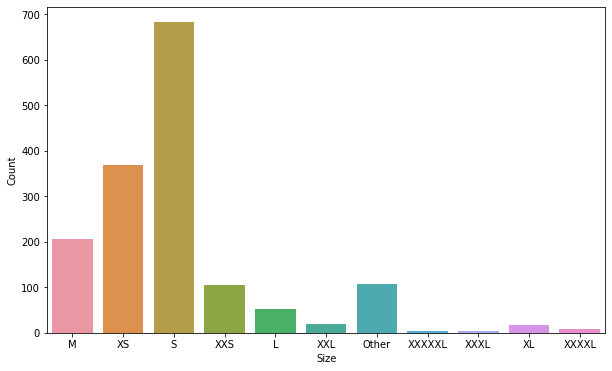

In [12]:
def size_scope(size):
    if size == 'XXS' \
        or size == 'XS' \
        or size == 'S' \
        or size == 'M' \
        or size == 'L' \
        or size == 'XL' \
        or size == 'XXL' \
        or size == 'XXXL' \
        or size == 'XXXXL' \
        or size == 'XXXXXL':
        return size
    else:
        return "Other"
    
summer['production_variation_size_id'] = summer['product_variation_size_id'].replace(np.nan, "Other")
summer['production_variation_size_id'] = summer['product_variation_size_id'].apply(size_scope)

# summer['production_variation_size_id'].sort_values(by , inplace = False, ascending = False)
plt.figure(figsize=(10,6))
_ = sns.countplot(x=summer['production_variation_size_id'], data=summer)
plt.xlabel("Size")
plt.ylabel("Count")

## Data Integrity

Upon plotting the graph above, I was curious of its real meaning. Many of the titles of each item in the dataset explain that the listing represents multiple sizes and colors. There is not enough data to determine how many sizes of a particular product are sold. The graph above is simply a count of how many times a size is mentioned in the column "production_variation_size_id". Therefore the data in this column will not be of value to my analysis.

## The influence of adboosts on units sold

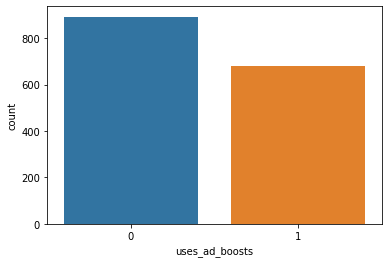

In [40]:
has_adboost = summer['uses_ad_boosts']==1
summer_w_adb = summer[has_adboost]
no_adboost = summer['uses_ad_boosts']==0
summer_wo_adb = summer[no_adboost]

sns.countplot(data=summer, x=summer['uses_ad_boosts'])
plt.show()

# It seems most items do not use ad boosts. Do the adboosts help with performance at all?

In [42]:
# Average units sold with adboost

mean_w_adb = summer_w_adb['units_sold'].mean()
median_w_adb = summer_w_adb['units_sold'].median()
mean_wo_adb = summer_wo_adb['units_sold'].mean()
median_wo_adb = summer_wo_adb['units_sold'].median()


print("This is the average number of units sold with adboosts: " + str(truncate(mean_w_adb, 2)))
print("This is the median number of units sold with adboosts: " + str(truncate(median_w_adb, 2)))

print("This is the average number of units sold without adboosts: " + str(truncate(mean_wo_adb, 2)))
print("This is the median number of units sold without adboosts: " + str(truncate(median_wo_adb, 2)))

with_boost = [4167.13]
without_boost = [4470.21]

# The row count for units sold WITH an ad-boost is 681.
# The row count for units sold WITHOUT an ad-boost is 892.
# Most items do not have an ad-boost applied to them. The ones that do, according to the mean and median values, \
# indicate that the ad-boost does not do any better performance wise than without the boost.


This is the average number of units sold with adboosts: 4167.13
This is the median number of units sold with adboosts: 1000.0
This is the average number of units sold without adboosts: 4470.21
This is the median number of units sold without adboosts: 1000.0


## The influence of adboosts on rating

In [45]:
print(truncate(summer_w_adb['rating'].mean(), 2))
print(truncate(summer_wo_adb['rating'].mean(), 2))

# Items without adboosts also typically have a slightly higher than those with an ad-boost.
# For reference, the average rating of all items in the dataset is 3.82



3.79
3.84


In [15]:
# This is further supported by evaluating the Pearson correlation using Pandas on the original dataset,
# which shows a weak negative correlation. 
print(summer['uses_ad_boosts'].corr(summer['units_sold']))


-0.016055000193612355


## The influence of an urgency banner on units sold

In [16]:
has_urgency = summer['has_urgency_banner']==1
summer_w_urgency = summer[has_urgency]
has_no_urgency = summer['has_urgency_banner']==0
summer_wo_urgency = summer[has_no_urgency]

print(summer_w_urgency['units_sold'].mean())
print(summer_w_urgency['units_sold'].median())
print(summer_w_urgency['units_sold'].count())

print(summer_wo_urgency['units_sold'].mean())
print(summer_wo_urgency['units_sold'].median())
print(summer_wo_urgency['units_sold'].count())

print(summer['units_sold'].mode())



3998.2198731501057
1000.0
473
4485.5427272727275
1000.0
1100
0    100
dtype: int64


## The influence of an urgency banner on rating

In [17]:
summer['rating'].mean()

3.8208963763509174

## Distribution of Item Ratings

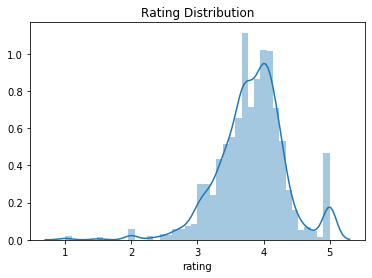

In [18]:
figsize = (20,50)
sns.distplot(summer['rating'])
plt.title('Rating Distribution')
plt.show()


## Distribution of Merchant Rating

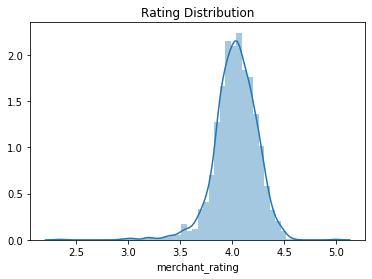

In [19]:
figsize = (10,5)
sns.distplot(summer['merchant_rating'])
plt.title('Rating Distribution')
plt.show()


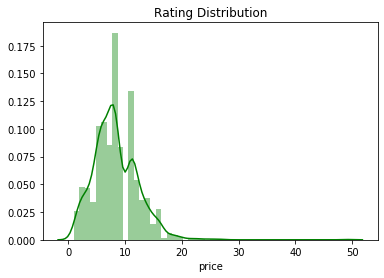

In [20]:
figsize = (10,5)
sns.distplot(summer['price'], color='green')
plt.title('Rating Distribution')
plt.show()


## Price Range Buckets & Distribution

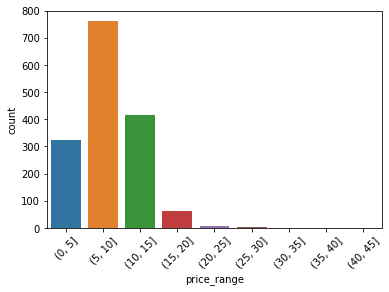

In [21]:
summer['price_range'] = pd.cut(summer['price'], bins=np.arange(0, 50, 5))

sns.countplot(summer['price_range'])
plt.xticks(rotation = 45, fontsize=10)
plt.show()

## Insights

## Correlation Heatmap among various, but not all,  variables

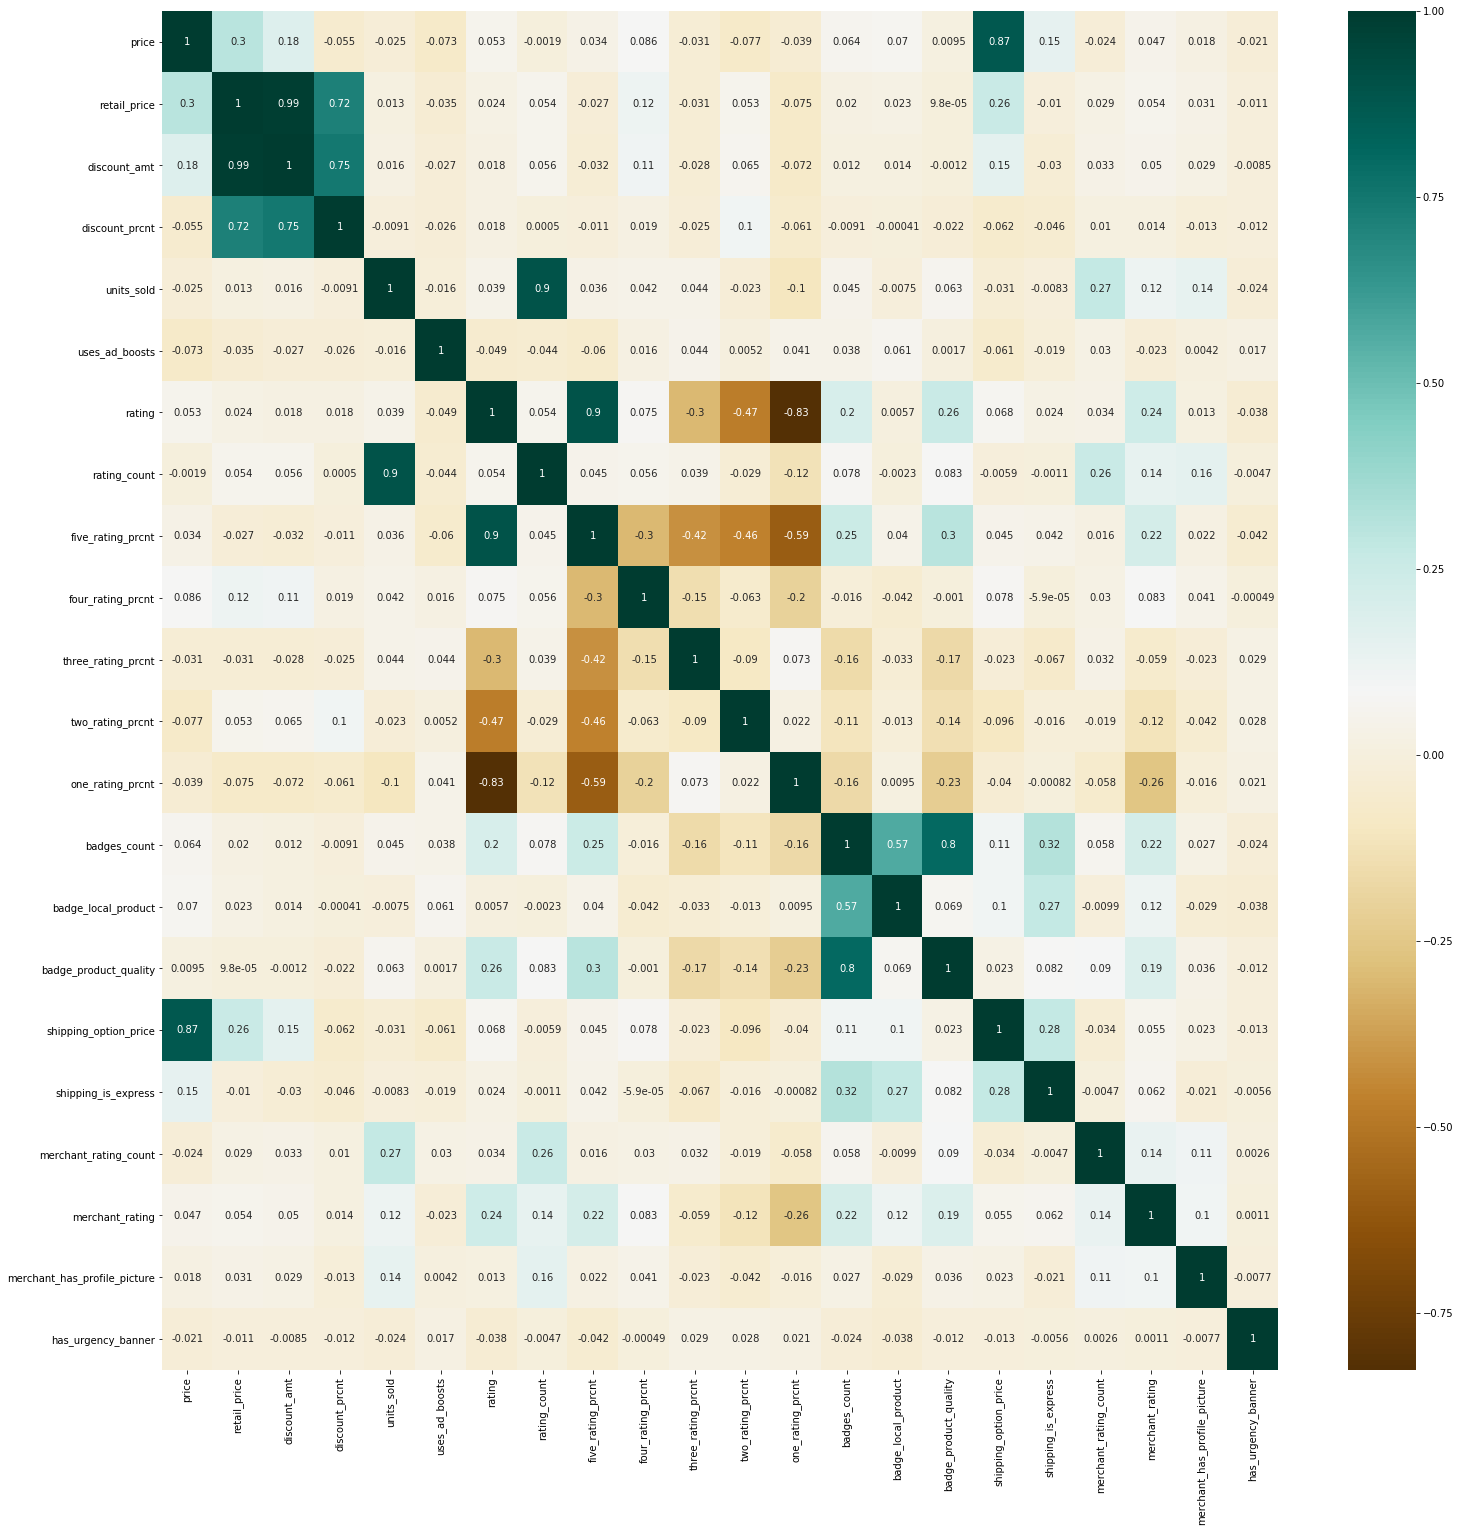

In [47]:
columns = summer[['price', 'retail_price', 'discount_amt', 'discount_prcnt', 'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
                  'five_rating_prcnt', 'four_rating_prcnt' ,'three_rating_prcnt', 'two_rating_prcnt', 
                  'one_rating_prcnt', 'badges_count', 'badge_local_product', 'badge_product_quality',
                 'shipping_option_price', 'shipping_is_express', 'merchant_rating_count', 'merchant_rating', 'merchant_has_profile_picture', 'has_urgency_banner']]
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(columns.corr(), annot=True, ax=ax, cbar=True, cmap="BrBG")
plt.show()


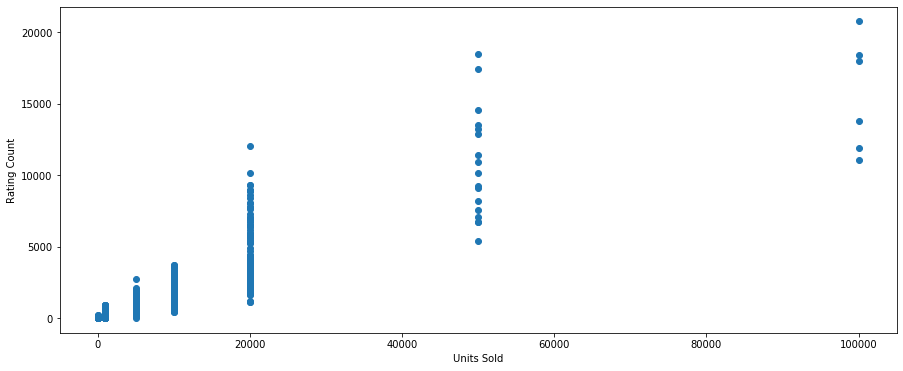

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(summer['units_sold'], summer['rating_count'])
ax.set_xlabel('Units Sold')
ax.set_ylabel('Rating Count')
plt.show()

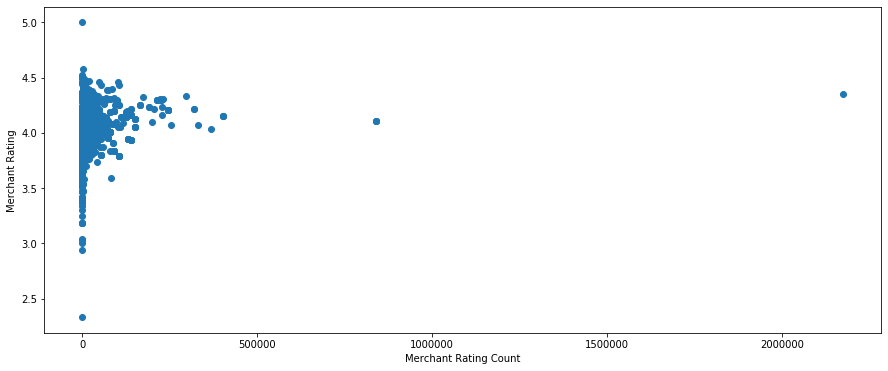

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(summer['merchant_rating_count'], summer['merchant_rating'])
ax.set_xlabel('Merchant Rating Count')
ax.set_ylabel('Merchant Rating')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24191 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21807 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36866 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39280 missing from c

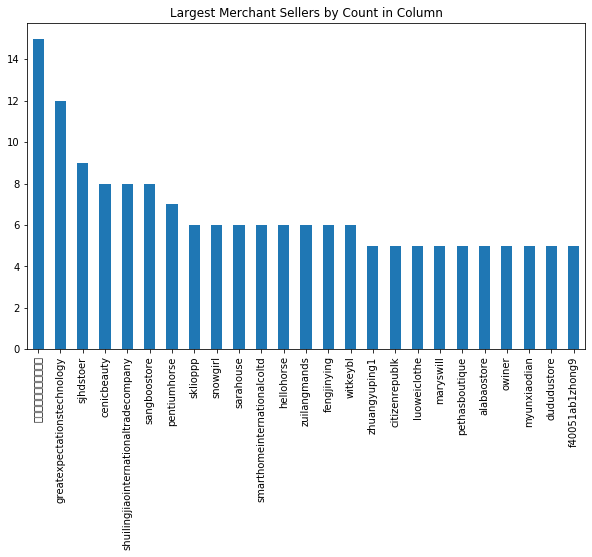

In [25]:
summer['merchant_name'].value_counts().nlargest(25).plot(kind='bar', figsize=(10,6))
plt.rc('font', family='Source Han Sans CN')
plt.title('Largest Merchant Sellers by Count in Column')
plt.show()

# Top seller shown in Unicode because merchant is Chinese.

findfont: Font family ['Source Han Sans CN'] not found. Falling back to DejaVu Sans.


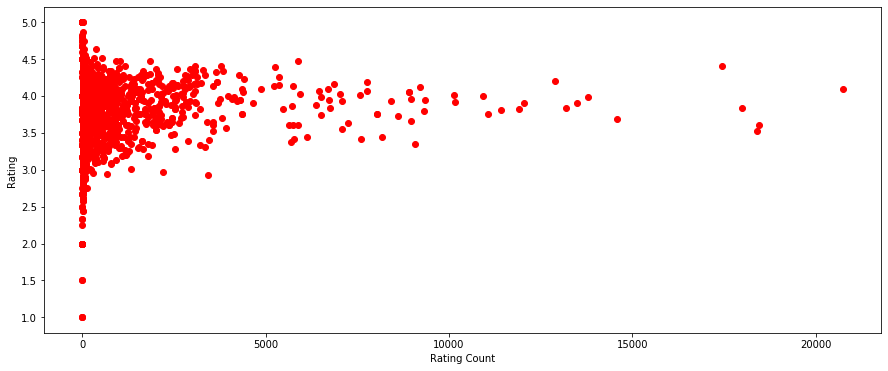

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(summer['rating_count'], summer['rating'], color='Red')
ax.set_xlabel('Rating Count')
ax.set_ylabel('Rating')
plt.show()

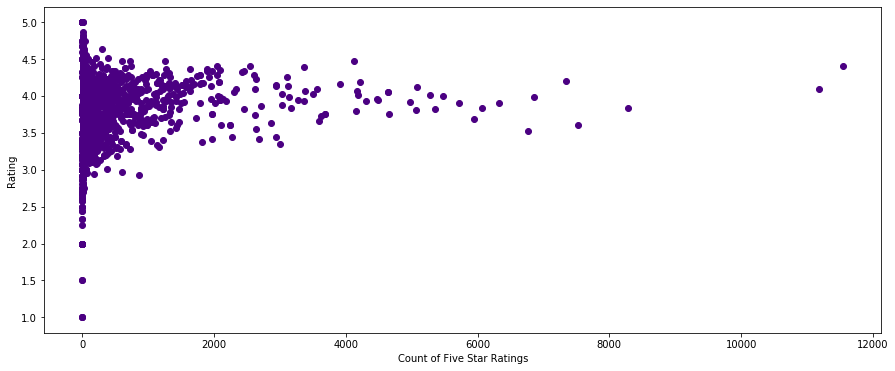

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(summer['rating_five_count'], summer['rating'], color='Indigo')
ax.set_xlabel('Count of Five Star Ratings')
ax.set_ylabel('Rating')
plt.show()

## Notes on Insights

Perhaps the most influential variable on units sold is the rating count. More ratings typically mean more units sold.
Additionally, higher ratings have a small influence on units sold as well.

Merchant rating and the amount of ratings a merchant have more meaningful correlations with units sold than the item
ratings themselves. These factors may indicate the reliability and popularity of a particular merchant.

Factors like adboosts and urgency banners, moves that may "feel" important, have little to no effect on units sold.
Discounts have only a slight influence on units sold. A sight like Wish.com is full of alleged "discounts" that make it appear as though items are cheaper on the website, as opposed to buying them elsewhere. 

A potential flaw to the discount hypothesis is that there are outliers affecting their influence. Some items' real price are higher than the retail price, offering a negative dollar or percentage amount to the discount columns.

However, the median values for discounts are significantly lower than the averages, proving that outliers may be affecting the whole, but insisting that the influence is still nonetheless insignificant. Further proved by the correlation between units sold and discounts. 

## Building a Predictive Model using Ordinary Least Squares Regression

In [28]:
columns = summer[['price', 'retail_price', 'discount_amt', 'discount_prcnt', 'uses_ad_boosts', 'rating', 'rating_count',
                  'rating_five_count', 'rating_four_count' ,'rating_three_count', 'rating_two_count', 
                  'rating_one_count', 'badges_count', 'badge_local_product', 'badge_product_quality',
                 'shipping_option_price', 'shipping_is_express', 'merchant_rating_count', 'merchant_rating', 'merchant_has_profile_picture']]
print(columns.isnull().sum())

price                           0
retail_price                    0
discount_amt                    0
discount_prcnt                  0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
shipping_option_price           0
shipping_is_express             0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64


In [29]:
Y = summer['units_sold']
X = columns
X = sm.add_constant(X)
model = sm.OLS(Y, X)
OLSmodelResult_Summer = model.fit()
OLSmodelResult_Summer.summary()

# Due to most p-values, as well as the f-statistic, this is likely not a good model despite the R-squared value.
# R-squared may be as high as it because of a multitude of dependent variables. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             units_sold   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     398.3
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:47:54   Log-Likelihood:                -15258.
No. Observations:                1573   AIC:                         3.055e+04
Df Residuals:                    1554   BIC:                         3.066e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -281.8211   2108.524     -0.134      0.894   -4417.674    3854.032
price                           22.4683     36.264      0.620      0.536     -48.662      93.599
retail_price                     4.6317     17.838      0.260      0.795     -30.357      39.621
discount_amt                   -17.8366     18.836     -0.947      0.344     -54.783      19.109
discount_prcnt                   4.8550      3.924      1.237      0.216      -2.842      12.552
uses_ad_boosts                 405.7897    204.405      1.985      0.047       4.850     806.729
rating                          10.2311    210.974      0.048      0.961    -403.593     424.055
rating_count                     2.4055      0.659      3.650      0.000       1.113       3.698
rating_five_count                3.4209      0.997      3.430      0.001       1.465       5.377
rating_four_count              -16.0764      2.841     -5.659      0.000     -21.649     -10.504
rating_three_count              28.4091      5.937      4.785      0.000      16.763      40.055
rating_two_count               -12.9093      9.050     -1.427      0.154     -30.660       4.841
rating_one_count                -0.4388      3.592     -0.122      0.903      -7.484       6.606
badges_count                 -4073.7187   1051.364     -3.875      0.000   -6135.960   -2011.478
badge_local_product           4650.5541   1499.077      3.102      0.002    1710.126    7590.982
badge_product_quality         3917.0342   1119.411      3.499      0.000    1721.318    6112.750
shipping_option_price         -135.9057    211.488     -0.643      0.521    -550.739     278.927
shipping_is_express           2697.7909   2367.295      1.140      0.255   -1945.638    7341.219
merchant_rating_count            0.0038      0.001      2.833      0.005       0.001       0.006
merchant_rating                197.3610    522.144      0.378      0.705    -826.821    1221.543
merchant_has_profile_picture   284.1520    293.441      0.968      0.333    -291.429     859.733
==============================================================================
Omnibus:                     1298.729   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147687.834
Skew:                           3.189   Prob(JB):                         0.00
Kurtosis:                      50.039   Cond. No.                     6.06e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

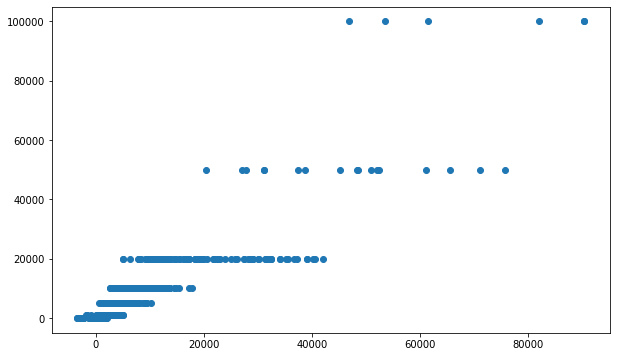

In [46]:
# Results were plotted out of curiosity. 

units_sold_predict = OLSmodelResult_Summer.predict()

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(units_sold_predict, summer['units_sold'])
plt.show()